In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import seaborn as sb

In [17]:
# convert it to a dataframe with xarrray
ds = xr.open_dataset("Rainfall_1994.nc")
rainDF = ds.to_dataframe()
rainDF = rainDF.reset_index()
rainDF# this is daily data for each set of coordinates (different locations)

,longitude,latitude,time,tp
0,-86.110001,11.21,1994-01-01,0.000000
1,-86.110001,11.21,1994-01-02,0.000000
2,-86.110001,11.21,1994-01-03,0.000000
3,-86.110001,11.21,1994-01-04,0.000000
4,-86.110001,11.21,1994-01-05,0.000000
...,...,...,...,...
76645,-82.610001,7.96,1994-12-27,0.000105
76646,-82.610001,7.96,1994-12-28,0.000158
76647,-82.610001,7.96,1994-12-29,0.000133
76648,-82.610001,7.96,1994-12-30,0.000393


In [18]:
# have group by the time and sum them up
rainGroupedDF = rainDF[["time","tp"]].groupby("time").agg({"tp":"sum"}).reset_index()
rainGroupedDF # this should be the rainfall per day for the whole country of Costa Rica

,time,tp
0,1994-01-01,0.008403
1,1994-01-02,0.004626
2,1994-01-03,0.006419
3,1994-01-04,0.004875
4,1994-01-05,0.015578
...,...,...
360,1994-12-27,0.025246
361,1994-12-28,0.029639
362,1994-12-29,0.042767
363,1994-12-30,0.042011


In [6]:
# grab every 7 days to simulate the epi weeks (since no data about the epi weeks can be found)
# this should be a new column that labels the epi week

# create a dictionary where the key is the time and the value is the epi week
epiDict = {}
epiWeekCounter = 0
# iterate through each row by the index
for i in range(0,365):
    if i % 7 == 0:
        # increase the epi week counter by 1
        epiWeekCounter += 1
        # add the integer as the epi week column for that row
        epiDict[i] = epiWeekCounter
    # else, only assign the current value of the epiWeekCounter to the cell
    else:
        epiDict[i] = epiWeekCounter
        
# delete the 364 index
del epiDict[364]
# return the dictionary
epiDict

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 3,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 4,
 22: 4,
 23: 4,
 24: 4,
 25: 4,
 26: 4,
 27: 4,
 28: 5,
 29: 5,
 30: 5,
 31: 5,
 32: 5,
 33: 5,
 34: 5,
 35: 6,
 36: 6,
 37: 6,
 38: 6,
 39: 6,
 40: 6,
 41: 6,
 42: 7,
 43: 7,
 44: 7,
 45: 7,
 46: 7,
 47: 7,
 48: 7,
 49: 8,
 50: 8,
 51: 8,
 52: 8,
 53: 8,
 54: 8,
 55: 8,
 56: 9,
 57: 9,
 58: 9,
 59: 9,
 60: 9,
 61: 9,
 62: 9,
 63: 10,
 64: 10,
 65: 10,
 66: 10,
 67: 10,
 68: 10,
 69: 10,
 70: 11,
 71: 11,
 72: 11,
 73: 11,
 74: 11,
 75: 11,
 76: 11,
 77: 12,
 78: 12,
 79: 12,
 80: 12,
 81: 12,
 82: 12,
 83: 12,
 84: 13,
 85: 13,
 86: 13,
 87: 13,
 88: 13,
 89: 13,
 90: 13,
 91: 14,
 92: 14,
 93: 14,
 94: 14,
 95: 14,
 96: 14,
 97: 14,
 98: 15,
 99: 15,
 100: 15,
 101: 15,
 102: 15,
 103: 15,
 104: 15,
 105: 16,
 106: 16,
 107: 16,
 108: 16,
 109: 16,
 110: 16,
 111: 16,
 112: 17,
 113: 17,
 114: 17,
 115: 17,
 116: 17,
 11

In [7]:
# now create a new column called SEMANA that uses the keys of the dictionary as the index and the values as the values in the new column
rainGroupedDF["SEMANA"] = np.nan
# iterate through each value in the dictionary
for key in epiDict:
    rainGroupedDF["SEMANA"][key] = epiDict[key]

# drop the row with index 364 out of the dataframe
rainGroupedDF.drop(364,axis=0,inplace=True)
# convert all the values for semana from floats into integers so they match the other dataframe
rainGroupedDF["SEMANA"] = rainGroupedDF["SEMANA"].astype("int")
# return the dataframe
rainGroupedDF

C:\Users\emily\AppData\Local\Temp\ipykernel_16720\2545954706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainGroupedDF["SEMANA"][key] = epiDict[key]


,time,tp,SEMANA
0,1994-01-01,0.008403,1
1,1994-01-02,0.004626,1
2,1994-01-03,0.006419,1
3,1994-01-04,0.004875,1
4,1994-01-05,0.015578,1
...,...,...,...
359,1994-12-26,0.039181,52
360,1994-12-27,0.025246,52
361,1994-12-28,0.029639,52
362,1994-12-29,0.042767,52


[Text(0.5, 1.0, 'Weekly Precipitation in Costa Rica, 1994'),
 Text(0.5, 0, 'Epi Week (Semana)'),
 Text(0, 0.5, 'Total Precipitation (m)')]

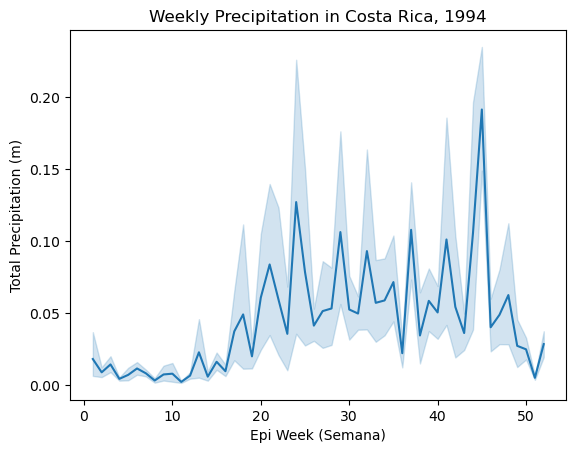

In [8]:
# now graph this over the epi weeks in line chart
fig,ax = plt.subplots()
sb.lineplot(data=rainGroupedDF, x="SEMANA", y="tp").set(title="Weekly Precipitation in Costa Rica, 1994",xlabel="Epi Week (Semana)",ylabel="Total Precipitation (m)")
# plt.savefig("Dengue_Incidence_Lineplot.png".format(fig), format="png", bbox_inches="tight")

In [4]:
# now import the dengue data for 1994
dengueDF = pd.read_csv("Dengue_Costa_Rica.csv")
# just isolate the rows that have data from 1994 for each week and the number of cases
dengueTotalDF = dengueDF[["YEAR","CANTON","SEMANA","CASES"]].query("CANTON == 'TOTAL DEL PAIS'")
dengue94DF = dengueTotalDF[["YEAR","CANTON","SEMANA","CASES"]].query("YEAR == 1994")
dengue94DF

,YEAR,CANTON,SEMANA,CASES
4264,1994,TOTAL DEL PAIS,1,289
4265,1994,TOTAL DEL PAIS,2,147
4266,1994,TOTAL DEL PAIS,3,164
4267,1994,TOTAL DEL PAIS,4,79
4268,1994,TOTAL DEL PAIS,5,121
4269,1994,TOTAL DEL PAIS,6,87
4270,1994,TOTAL DEL PAIS,7,98
4271,1994,TOTAL DEL PAIS,8,101
4272,1994,TOTAL DEL PAIS,9,90
4273,1994,TOTAL DEL PAIS,10,70


Text(0.5, 1.0, 'Weekly Dengue Cases and Total Precipitation in Costa Rica, 1994')

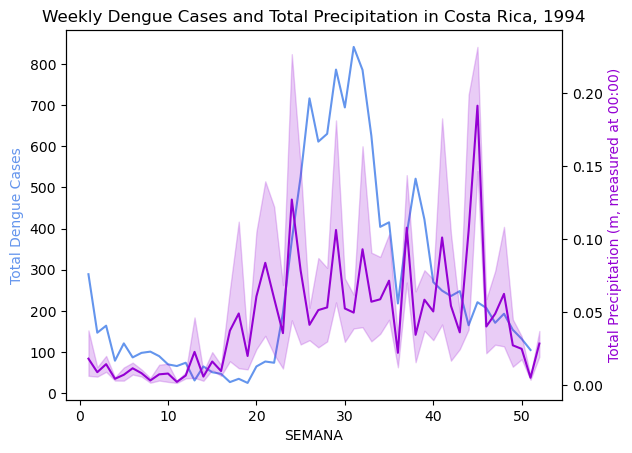

In [10]:
# use sb.lineplot
fig,ax1 = plt.subplots()
# subplots returns two values in a tuple for when we have two variables separated by commas
ax1 = sb.lineplot(x="SEMANA",y="CASES",data=dengue94DF,ax=ax1, color="cornflowerblue")
ax2 = ax1.twinx() # this creates a second axis object with the two plots sharing the x axis
sb.lineplot(x="SEMANA",y="tp",data=rainGroupedDF,ax=ax2,color="darkviolet") # color sets it to red

# set the labels so they correspond to the colots of the lines
ax1.set_ylabel("Total Dengue Cases",color="cornflowerblue") # specify the label then the color
ax2.set_ylabel("Total Precipitation (m, measured at 00:00)",color="darkviolet") # this makes the graph easier to read
# add a title
plt.title("Weekly Dengue Cases and Total Precipitation in Costa Rica, 1994")
# plt.savefig("Dengue_Rain_Lineplot.png".format(fig), format="png")

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=dengue94DF['SEMANA'], y=dengue94DF['CASES'],
                     name='Total Dengue Cases',
                     marker_color = 'lightgrey',
                     marker_line_color='rgb(8,48,107)',
                     marker_line_width=1),
              row = 1, col = 1, secondary_y=False)

fig.add_trace(go.Scatter(x=rainGroupedDF['SEMANA'], y=rainGroupedDF['tp'], line=dict(color='crimson'), name='Total Precipitation (m)'),
              row = 1, col = 1, secondary_y=True)
# add labels
fig.update_xaxes(title_text="Epi Week (Semana)")
fig.update_yaxes(title_text="Total Dengue Cases", color="lightgrey",secondary_y=False)
fig.update_yaxes(title_text="Total Precipitation (m)", color="crimson",secondary_y=True)
# add a title
# fig.update_layout(title_text="Weekly Total Precipitation and Dengue Cases in Costa Rica, 1994", title_x=0.5)
# fig.write_html("Weekly_Rain_Dengue.html")
fig.show()

In [19]:
# now import the netCDF containing total precipitation for all years 93-23
# convert it to a dataframe with xarrray
ds1 = xr.open_dataset("Rainfall_All_Years.nc")
rain1DF = ds1.to_dataframe().reset_index()
# have group by the time and sum them up
rainYearDF = rain1DF[["time","tp"]].groupby("time").agg({"tp":"sum"}).reset_index()
rainYearDF # this should be the rainfall per day for the whole country of Costa Rica for every year since 1993

,time,tp
0,1993-01-01,0.006569
1,1993-01-02,0.006465
2,1993-01-03,0.035986
3,1993-01-04,0.031144
4,1993-01-05,0.008576
...,...,...
11286,2023-11-26,0.036340
11287,2023-11-27,0.017936
11288,2023-11-28,0.027213
11289,2023-11-29,0.007320


In [21]:
# import the epiweeks function
from epiweeks import Week, Year
# # create a new column for the epi week
rainYearDF["EPI"] = rainYearDF["time"].apply(Week.fromdate)
rainYearDF
# isolate just the rows the have total del pais as the canton
# crTotalDF = dengueDF[["YEAR","CANTON","SEMANA","CASES"]].query("CANTON == 'TOTAL DEL PAIS'")
# crTotalDF

,time,tp,EPI
0,1993-01-01,0.006569,199253
1,1993-01-02,0.006465,199253
2,1993-01-03,0.035986,199301
3,1993-01-04,0.031144,199301
4,1993-01-05,0.008576,199301
...,...,...,...
11286,2023-11-26,0.036340,202348
11287,2023-11-27,0.017936,202348
11288,2023-11-28,0.027213,202348
11289,2023-11-29,0.007320,202348


In [36]:
# for the rainfall dataframe, aggregate and groupby the EPi column, summing the tp
rainTotalDF = rainYearDF[["time","tp","EPI"]].groupby(["EPI"]).agg({"tp":"sum"}).reset_index()
rainTotalDF.to_csv('Rain_Total.csv', index=False)

In [22]:
newDF = pd.read_csv("Rain_Total.csv")
# the epi column is now an integer, which can be split based on the index to create an epi week column called semana
newDF["EPI"] = newDF["EPI"].astype("str")
newDF["SEMANA"] = newDF["EPI"].apply(lambda x: int(x[-2:]))
newDF["YEAR"] = newDF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1614):
    if newDF["SEMANA"][i] == 53:
        # drop the row
        newDF = newDF.drop(i)
newDF = newDF.reset_index().drop("index", axis=1)
newDF

,EPI,tp,SEMANA,YEAR
0,199301,0.348911,1,1993
1,199302,0.221464,2,1993
2,199303,0.083928,3,1993
3,199304,0.121633,4,1993
4,199305,0.138129,5,1993
...,...,...,...,...
1603,202344,1.277918,44,2023
1604,202345,0.684428,45,2023
1605,202346,0.948230,46,2023
1606,202347,0.755001,47,2023


In [11]:
# groupby the semana and aggregate the tp
aggDF = newDF.groupby("SEMANA").agg({"tp":"sum"}).reset_index()
aggDF

,SEMANA,tp
0,1,5.681505
1,2,5.789178
2,3,3.958844
3,4,3.528537
4,5,2.976718
5,6,3.403670
6,7,3.571329
7,8,3.146952
8,9,2.619154
9,10,2.540015


In [12]:
groupDengueDF = crTotalDF.groupby("SEMANA").agg({"CASES":"sum"}).reset_index()
# delete the last row for epi week 53
groupDengueDF = groupDengueDF.drop(52, axis=0)
groupDengueDF

,SEMANA,CASES
0,1,3248
1,2,2894
2,3,2703
3,4,2429
4,5,2259
5,6,2169
6,7,2148
7,8,2058
8,9,2032
9,10,1784


In [13]:
# merge groupDengueDF and aggDF
mergedDF = pd.merge(groupDengueDF, aggDF, on="SEMANA")
mergedDF

,SEMANA,CASES,tp
0,1,3248,5.681505
1,2,2894,5.789178
2,3,2703,3.958844
3,4,2429,3.528537
4,5,2259,2.976718
5,6,2169,3.403670
6,7,2148,3.571329
7,8,2058,3.146952
8,9,2032,2.619154
9,10,1784,2.540015


In [56]:
# make a bar plot of the cases overlayed by a line plot of the precipitation by epi week
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=groupDengueDF['SEMANA'], y=groupDengueDF['CASES'],
                     name='Total Dengue Cases',
                     marker_color = 'lightgrey',
                     marker_line_color='slategrey',
                     marker_line_width=1),
              row = 1, col = 1, secondary_y=False)

fig.add_trace(go.Scatter(x=aggDF['SEMANA'], y=aggDF['tp'], line=dict(color='darkmagenta'), name='Total Precipitation (m)'),
              row = 1, col = 1, secondary_y=True)
# add labels
fig.update_xaxes(title_text="Epi Week (Semana)")
fig.update_yaxes(title_text="Total Dengue Cases", color="grey",secondary_y=False)
fig.update_yaxes(title_text="Total Precipitation (m)", color="darkmagenta",secondary_y=True)
# add a title
fig.update_layout(title_text="Weekly Total Precipitation and Dengue Cases in Costa Rica, 1993-2023", title_x=0.5)
fig.write_html("Weekly_Rain_All_Years.html")
fig.show()

In [19]:
# now import the netCDF containing surface pressure for all years 93-23
# convert it to a dataframe with xarrray
ds = xr.open_dataset("C:\\Users\\emily\\Downloads\\SPressure_All_Years.nc")
pressure1DF = ds.to_dataframe().reset_index()
# convert the provided date to epi week
pressure1DF["EPI"] = pressure1DF["time"].apply(Week.fromdate)
pressure1DF = pressure1DF.drop(["longitude","latitude","expver","time"], axis=1)
pressure1DF

,sp,EPI
0,100632.492188,199253
1,100757.593750,199253
2,100810.390625,199301
3,100848.265625,199301
4,100873.234375,199301
...,...,...
4748095,100477.828125,202350
4748096,100364.492188,202350
4748097,100365.640625,202350
4748098,100352.726562,202350


In [20]:
# for the pressure dataframe, aggregate and groupby the EPI column, averaging the sp
pTotalDF = pressure1DF[["sp","EPI"]].groupby(["EPI"]).agg({"sp":"mean"}).reset_index()
# save the dataframe as a csv 
pTotalDF.to_csv('Pressure_Total.csv', index=False)

In [23]:
# load the pressure in again so the date column is an iterable string
pressure2DF = pd.read_csv("Pressure_Total.csv")
# the epi column is now an integer, which can be split based on the index to create an epi week column called semana
pressure2DF["EPI"] = pressure2DF["EPI"].astype("str")
pressure2DF["SEMANA"] = pressure2DF["EPI"].apply(lambda x: int(x[-2:]))
pressure2DF["YEAR"] = pressure2DF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1614):
    if pressure2DF["SEMANA"][i] == 53:
        # drop the row
        pressure2DF = pressure2DF.drop(i)
pressure2DF = pressure2DF.reset_index().drop("index", axis=1)
pressure2DF

,EPI,sp,SEMANA,YEAR
0,199301,98784.220,1,1993
1,199302,98767.760,2,1993
2,199303,98680.150,3,1993
3,199304,98528.510,4,1993
4,199305,98673.305,5,1993
...,...,...,...,...
1605,202346,98488.010,46,2023
1606,202347,98718.160,47,2023
1607,202348,98560.984,48,2023
1608,202349,98559.010,49,2023


In [23]:
# groupby the epi week and average the surface pressure (sp)
pressureDF = pressure2DF.groupby("SEMANA").agg({"sp":"mean"}).reset_index()
# now merge the pressureDF with the mergedDF on the epi week
merged2DF = pd.merge(mergedDF, pressureDF, on="SEMANA")
merged2DF

,SEMANA,CASES,tp,sp
0,1,3248,5.681505,98671.549452
1,2,2894,5.789178,98701.605710
2,3,2703,3.958844,98685.850839
3,4,2429,3.528537,98656.084355
4,5,2259,2.976718,98633.101710
5,6,2169,3.403670,98650.989806
6,7,2148,3.571329,98636.521613
7,8,2058,3.146952,98630.334806
8,9,2032,2.619154,98615.284129
9,10,1784,2.540015,98612.104323


In [25]:
# now import the netCDF containing skin temp for all years 93-23
# convert it to a dataframe with xarrray
ds = xr.open_dataset("C:\\Users\\emily\\Downloads\\Skin_Temp_All_Years.nc")
skin1DF = ds.to_dataframe().reset_index()
skin1DF
# convert the provided date to epi week
skin1DF["EPI"] = skin1DF["time"].apply(Week.fromdate)
skin1DF = skin1DF.drop(["longitude","latitude","expver","time"], axis=1)
# for the skin dataframe, aggregate and groupby the EPI column, averaging the skt
sMeanDF = skin1DF[["skt","EPI"]].groupby(["EPI"]).agg({"skt":"mean"}).reset_index()
# save the dataframe as a csv 
sMeanDF.to_csv('Skin_Mean.csv', index=False)

In [28]:
skin2DF = pd.read_csv("Skin_Mean.csv")
# cast EPI as a string so it can be split
skin2DF["EPI"] = skin2DF["EPI"].astype("str")
skin2DF["SEMANA"] = skin2DF["EPI"].apply(lambda x: int(x[-2:]))
skin2DF["YEAR"] = skin2DF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1614):
    if skin2DF["SEMANA"][i] == 53:
        # drop the row
        skin2DF = skin2DF.drop(i)
skin2DF = skin2DF.reset_index().drop("index", axis=1)
# groupby the epi week and average the surface pressure (sp)
skinDF = skin2DF.groupby("SEMANA").agg({"skt":"mean"}).reset_index()
# now merge the pressureDF with the mergedDF on the epi week
# now merge it with the merged2DF
merged3DF = pd.merge(merged2DF, skinDF, on="SEMANA")
merged3DF

,SEMANA,CASES,tp,sp,skt
0,1,3248,5.681505,98671.549452,298.350527
1,2,2894,5.789178,98701.605710,298.323602
2,3,2703,3.958844,98685.850839,298.350873
3,4,2429,3.528537,98656.084355,298.494824
4,5,2259,2.976718,98633.101710,298.607721
5,6,2169,3.403670,98650.989806,298.651999
6,7,2148,3.571329,98636.521613,298.821280
7,8,2058,3.146952,98630.334806,298.859167
8,9,2032,2.619154,98615.284129,299.035637
9,10,1784,2.540015,98612.104323,299.101096


In [30]:
# now import the netCDF containing skin temp for all years 93-23
# convert it to a dataframe with xarrray
ds = xr.open_dataset("C:\\Users\\emily\\Downloads\\Runoff_All_Years.nc")
run1DF = ds.to_dataframe().reset_index()
# convert the provided date to epi week
run1DF["EPI"] = run1DF["time"].apply(Week.fromdate)
run1DF = run1DF.drop(["longitude","latitude","expver","time"], axis=1)
# for the run dataframe, aggregate and groupby the EPI column, averaging the skt
rMeanDF = run1DF[["sro","EPI"]].groupby(["EPI"]).agg({"sro":"sum"}).reset_index()
# save the dataframe as a csv 
rMeanDF.to_csv('Runoff_Mean.csv', index=False)

# import the dataframe
run2DF = pd.read_csv("Runoff_Mean.csv")
# cast EPI as a string so it can be split
run2DF["EPI"] = run2DF["EPI"].astype("str")
run2DF["SEMANA"] = run2DF["EPI"].apply(lambda x: int(x[-2:]))
run2DF["YEAR"] = run2DF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1614):
    if run2DF["SEMANA"][i] == 53:
        # drop the row
        run2DF = run2DF.drop(i)
run2DF = run2DF.reset_index().drop("index", axis=1)
# groupby the epi week and average the surface pressure (sp)
runDF = run2DF.groupby("SEMANA").agg({"sro":"sum"}).reset_index()
# now merge it with the merged2DF
merged4DF = pd.merge(merged3DF, runDF, on="SEMANA")
merged4DF

,SEMANA,CASES,tp,sp,skt,sro
0,1,3248,5.681505,98671.549452,298.350527,0.550657
1,2,2894,5.789178,98701.605710,298.323602,0.790112
2,3,2703,3.958844,98685.850839,298.350873,0.461714
3,4,2429,3.528537,98656.084355,298.494824,0.337289
4,5,2259,2.976718,98633.101710,298.607721,0.351952
5,6,2169,3.403670,98650.989806,298.651999,0.415097
6,7,2148,3.571329,98636.521613,298.821280,0.329788
7,8,2058,3.146952,98630.334806,298.859167,0.266961
8,9,2032,2.619154,98615.284129,299.035637,0.268637
9,10,1784,2.540015,98612.104323,299.101096,0.227782


In [32]:
merged4DF.to_csv("DengueCases_Climate.csv",index=False)

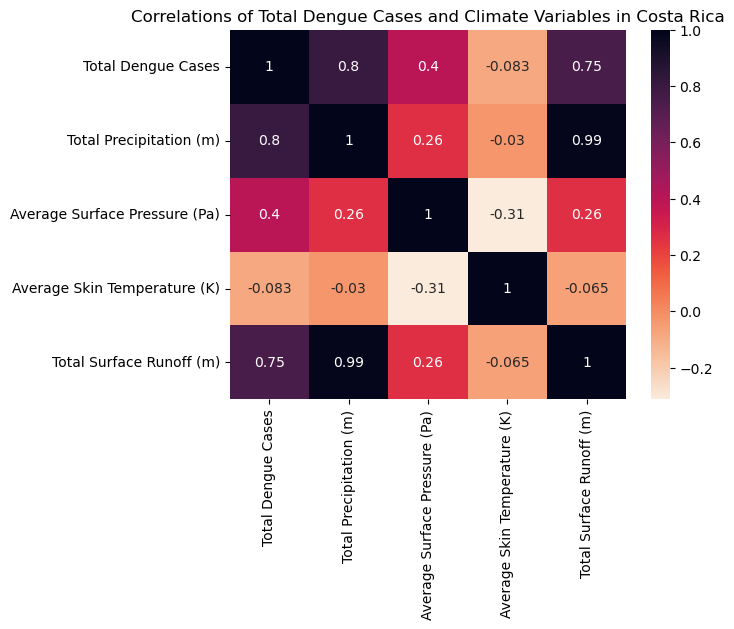

In [41]:
# remove the semana column
merged5DF = merged4DF.drop("SEMANA",axis=1)
# rename the columns
merged5DF = merged5DF.rename(columns={"CASES":"Total Dengue Cases","tp":"Total Precipitation (m)",
                                     "sp":"Average Surface Pressure (Pa)","skt":"Average Skin Temperature (K)",
                                     "sro":"Total Surface Runoff (m)"})

# create a correlation matrix

corrMatrix = merged5DF.corr()
ax = sb.heatmap(corrMatrix, annot=True, cmap=sb.cm.rocket_r)
ax.set(title="Correlations of Total Dengue Cases and Climate Variables in Costa Rica")
plt.savefig("Dengue_Climate_Correlations.png".format(ax), format="png",bbox_inches="tight")
plt.show()

In [11]:
# now import the netCDF containing a bunch of data for all years 93-23
# convert it to a dataframe with xarrray
ds = xr.open_dataset("C:\\Users\\emily\\Downloads\\All_Data.nc")
data1DF = ds.to_dataframe().reset_index()

# import the epiweeks function
from epiweeks import Week, Year

# convert the provided date to epi week
data1DF["EPI"] = data1DF["time"].apply(Week.fromdate)
data1DF = data1DF.drop(["longitude","latitude","expver","time"], axis=1)
# for the dataframe, aggregate and groupby the EPI column, averaging the skt
tempDF = data1DF[["t2m","EPI"]].groupby(["EPI"]).agg({"t2m":"mean"}).reset_index()
evapDF = data1DF[["e","EPI"]].groupby(["EPI"]).agg({"e":"sum"}).reset_index()
highvegDF = data1DF[["lai_hv","EPI"]].groupby(["EPI"]).agg({"lai_hv":"mean"}).reset_index()
lowvegDF = data1DF[["lai_lv","EPI"]].groupby(["EPI"]).agg({"lai_lv":"mean"}).reset_index()
solradDF = data1DF[["ssr","EPI"]].groupby(["EPI"]).agg({"ssr":"mean"}).reset_index()
cloudDF = data1DF[["tcc","EPI"]].groupby(["EPI"]).agg({"tcc":"mean"}).reset_index()

# combine all the above dataframes into a single dataframe combined on the EPI column
data2DF = pd.merge(tempDF, evapDF, on="EPI")
data3DF = pd.merge(data2DF, highvegDF, on="EPI")
data4DF = pd.merge(data3DF, lowvegDF, on ="EPI")
data5DF = pd.merge(data4DF, solradDF, on = "EPI")
data6DF =pd.merge(data5DF, cloudDF, on = "EPI")
data6DF
# save the dataframe as a csv 
data6DF.to_csv("All_Data.csv", index=False)

In [60]:
# merge other data from total precipitation, pressure, and dengue cases to this

# precipitation is newDF
# surface pressure is pressure2DF

someDF = pd.merge(allDF, newDF, on="EPI")
almostDF = pd.merge(someDF, pressure2DF, on="EPI")

# completeDF will include all climate data and dengue case data
completeDF = pd.merge(almostDF, crTotalDF, on="EPI")
list(completeDF.columns)


['EPI',
 't2m',
 'e',
 'lai_hv',
 'lai_lv',
 'ssr',
 'tcc',
 'SEMANA_x',
 'YEAR_x',
 'tp',
 'SEMANA_y',
 'YEAR_y',
 'sp',
 'SEMANA',
 'YEAR',
 'CASES']

In [61]:
completeDF = completeDF.drop(["SEMANA_x", "SEMANA_y","YEAR_x","YEAR_y"], axis=1)
completeDF

,EPI,t2m,e,lai_hv,lai_lv,ssr,tcc,tp,sp,SEMANA,YEAR,CASES
0,199301,297.78940,-0.103413,2.165826,1.131991,28923.4690,0.627398,0.348911,98784.220,1,1993,0
1,199302,297.64352,-0.102992,2.171554,1.131615,42002.4530,0.650488,0.221464,98767.760,2,1993,0
2,199303,298.32034,-0.119359,2.174013,1.131891,59272.6520,0.279556,0.083928,98680.150,3,1993,0
3,199304,298.37518,-0.140828,2.174992,1.132465,68860.8500,0.469671,0.121633,98528.510,4,1993,0
4,199305,298.42550,-0.137572,2.175970,1.133039,83244.4200,0.392348,0.138129,98673.305,5,1993,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1264,202344,298.30900,-0.135437,2.085116,1.089771,3374.0293,0.988676,1.277918,98577.734,44,2023,0
1265,202345,299.34320,-0.105246,2.080401,1.093079,3568.6658,0.742897,0.684428,98469.430,45,2023,0
1266,202346,299.11030,-0.115640,2.078321,1.097037,2740.3990,0.949415,0.948230,98488.010,46,2023,0
1267,202347,298.80582,-0.112461,2.092449,1.104988,3255.7290,0.793152,0.755001,98718.160,47,2023,0


In [15]:
# import the new csv file, which has the epi column now as an iterable object
allDF = pd.read_csv("All_Data.csv")
# cast EPI as a string so it can be split
allDF["EPI"] = allDF["EPI"].astype("str")
allDF["SEMANA"] = allDF["EPI"].apply(lambda x: int(x[-2:]))
allDF["YEAR"] = allDF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1618):
    if allDF["SEMANA"][i] == 53:
        # drop the row
        allDF = allDF.drop(i)
allDF = allDF.reset_index().drop("index", axis=1)
allDF

,EPI,t2m,e,lai_hv,lai_lv,ssr,tcc,SEMANA,YEAR
0,199301,297.78940,-0.103413,2.165826,1.131991,28923.4690,0.627398,1,1993
1,199302,297.64352,-0.102992,2.171554,1.131615,42002.4530,0.650488,2,1993
2,199303,298.32034,-0.119359,2.174013,1.131891,59272.6520,0.279556,3,1993
3,199304,298.37518,-0.140828,2.174992,1.132465,68860.8500,0.469671,4,1993
4,199305,298.42550,-0.137572,2.175970,1.133039,83244.4200,0.392348,5,1993
...,...,...,...,...,...,...,...,...,...
1607,202348,299.20435,-0.108853,2.109212,1.113584,4708.1646,0.621207,48,2023
1608,202349,299.68005,-0.116649,2.125968,1.122183,7369.7856,0.275649,49,2023
1609,202350,299.59400,-0.118850,2.142508,1.130597,8993.7530,0.423409,50,2023
1610,202351,299.16440,-0.172912,2.151682,1.132953,13533.6400,0.723535,51,2023


In [50]:
dengueDF = pd.read_csv("Dengue_Costa_Rica.csv")
crTotalDF = dengueDF[["YEAR","CANTON","SEMANA","CASES"]].query("CANTON=='TOTAL DEL PAIS'").reset_index()
# drop any rows that have 53 as the epi week
for i in range(0,1282):
    if crTotalDF["SEMANA"][i] == 53:
        # drop the row
        crTotalDF = crTotalDF.drop(i)
        crTotalDF.reset_index()
crTotalDF = crTotalDF.reset_index().drop("index", axis=1)
crTotalDF = crTotalDF.drop(["level_0","CANTON"], axis=1)
crTotalDF

,YEAR,SEMANA,CASES
0,1993,1,0
1,1993,2,0
2,1993,3,0
3,1993,4,0
4,1993,5,0
...,...,...,...
1268,2023,48,0
1269,2023,49,0
1270,2023,50,0
1271,2023,51,0


In [52]:
# need to combine the year and semana columns into the epi column to match
# convert both the year and semana columns to strings
crTotalDF["YEAR"] = crTotalDF["YEAR"].astype("str")
crTotalDF["SEMANA"] = crTotalDF["SEMANA"].astype("str")
# add leading zeroes using zfill
crTotalDF["SEMANA"] = crTotalDF["SEMANA"].apply(lambda x: x.zfill(2))

# combine the semana and year columns to create the epi column
crTotalDF["EPI"] = crTotalDF["YEAR"] + crTotalDF["SEMANA"]
crTotalDF = crTotalDF.drop(["YEAR","SEMANA"], axis=1)
crTotalDF
        

,CASES,EPI
0,0,199301
1,0,199302
2,0,199303
3,0,199304
4,0,199305
...,...,...
1268,0,202348
1269,0,202349
1270,0,202350
1271,0,202351


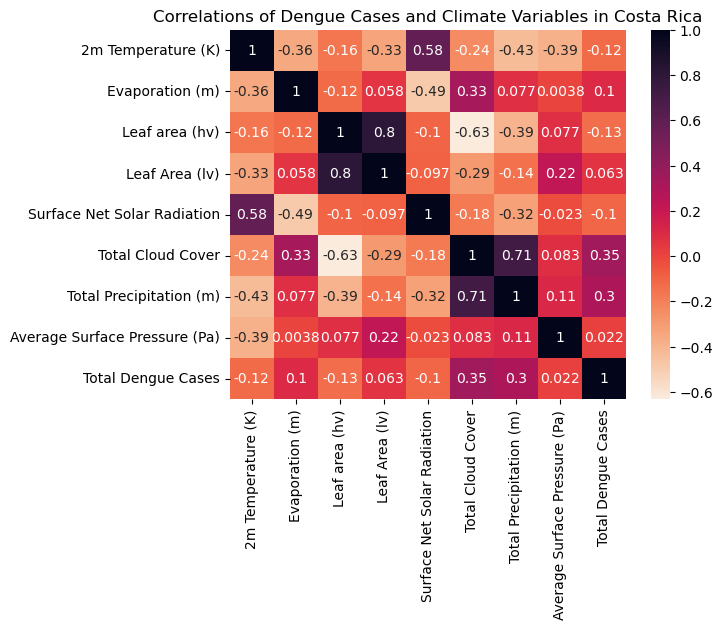

In [65]:
# now time to visualize completeDF and all the correlations in a correlation table
# remove the semana, year, and epi columns
correlationDF = completeDF.drop(["SEMANA","YEAR","EPI"],axis=1)
# rename the columns
correlationDF = correlationDF.rename(columns={"CASES":"Total Dengue Cases","tp":"Total Precipitation (m)",
                                     "sp":"Average Surface Pressure (Pa)","tcc":"Total Cloud Cover",
                                     "t2m":"2m Temperature (K)","ssr":"Surface Net Solar Radiation",
                                             "e":"Evaporation (m)","lai_hv":"Leaf area (hv)","lai_lv":"Leaf Area (lv)"})

# create a correlation matrix

corrMatrix = correlationDF.corr()
ax = sb.heatmap(corrMatrix, annot=True, cmap=sb.cm.rocket_r)
ax.set(title="Correlations of Dengue Cases and Climate Variables in Costa Rica")
plt.savefig("Dengue_Climate_Correlations_More.png".format(ax), format="png",bbox_inches="tight")
plt.show()

In [64]:
completeDF.to_csv("Climate_Correlations.csv",index=False)

In [66]:
# import libraries for machine learning
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [68]:
# split into independent and dependent variables
x = completeDF.iloc[:,6].values # this is for total cloud cover
y = completeDF.iloc[:,11].values # this is for dengue cases

# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# reshape variables since sklearn expects a 2D array as input
x_test = x_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)

# line_reg is model calling model "LinearRegression"
lin_reg=linear_model.LinearRegression()

# now fit the model in the linear regression model
lin_reg.fit(x_train,y_train)

# make the prediction using the test data
lin_reg_pred = lin_reg.predict(x_test)

# get the coefficients and intercepts for the model
print("Coefficients:\n",lin_reg.coef_)
print("Intercept:\n",lin_reg.intercept_)
# print the mean squared error
print("Mean squared error: %.2f"
     % mean_squared_error(y_test, lin_reg_pred))
# variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(y_test, lin_reg_pred))

Coefficients:
 [355.83792616]
Intercept:
 -39.17669778435538
Mean squared error: 78508.88
Variance score: 0.13


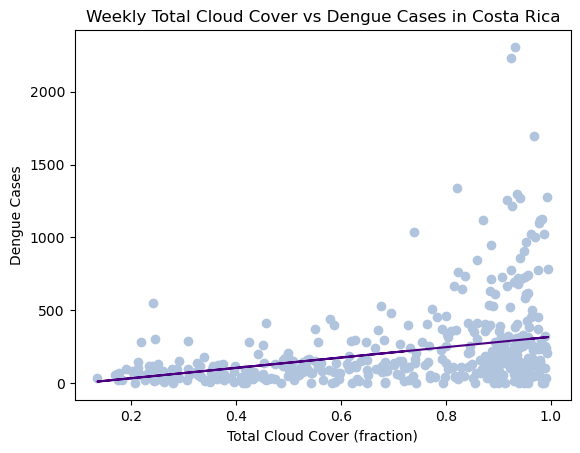

In [73]:
# plot total cloud cover (x) vs dengue cases (y)
plt.scatter(x_test, y_test, color="lightsteelblue")
plt.plot(x_test, lin_reg_pred, color="indigo")
plt.title("Weekly Total Cloud Cover vs Dengue Cases in Costa Rica")
plt.xlabel("Total Cloud Cover (fraction)")
plt.ylabel("Dengue Cases")
plt.savefig("TCC_Dengue.png",format="png")
plt.show()

In [74]:
# split into independent and dependent variables
x = completeDF.iloc[:,4].values # this is for low vegetation
y = completeDF.iloc[:,11].values # this is for dengue cases

# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# reshape variables since sklearn expects a 2D array as input
x_test = x_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)

# line_reg is model calling model "LinearRegression"
lin_reg=linear_model.LinearRegression()

# now fit the model in the linear regression model
lin_reg.fit(x_train,y_train)

# make the prediction using the test data
lin_reg_pred = lin_reg.predict(x_test)

# get the coefficients and intercepts for the model
print("Coefficients:\n",lin_reg.coef_)
print("Intercept:\n",lin_reg.intercept_)
# print the mean squared error
print("Mean squared error: %.2f"
     % mean_squared_error(y_test, lin_reg_pred))
# variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(y_test, lin_reg_pred))

Coefficients:
 [1039.7328552]
Intercept:
 -936.062802701263
Mean squared error: 90524.75
Variance score: -0.00


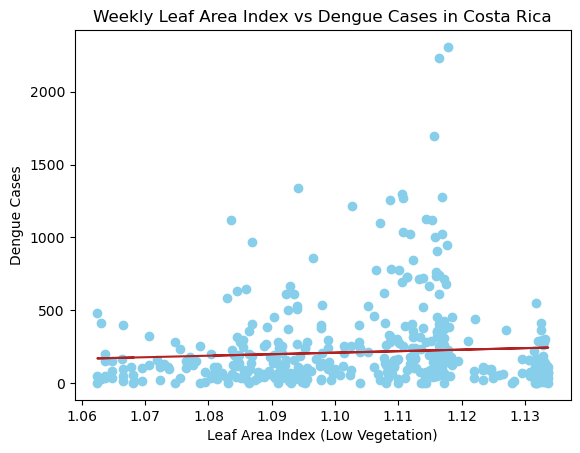

In [81]:
# plot low vegetation (x) vs dengue cases (y)
plt.scatter(x_test, y_test, color="skyblue")
plt.plot(x_test, lin_reg_pred, color="firebrick")
plt.title("Weekly Leaf Area Index vs Dengue Cases in Costa Rica")
plt.xlabel("Leaf Area Index (Low Vegetation)")
plt.ylabel("Dengue Cases")
plt.savefig("Leaf_Dengue.png",format="png")
plt.show()

In [94]:
# split into independent and dependent variables
x = completeDF.iloc[:,8].values # this is for pressure
y = completeDF.iloc[:,11].values # this is for dengue cases

# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# reshape variables since sklearn expects a 2D array as input
x_test = x_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)

# line_reg is model calling model "LinearRegression"
lin_reg=linear_model.LinearRegression()

# now fit the model in the linear regression model
lin_reg.fit(x_train,y_train)

# make the prediction using the test data
lin_reg_pred = lin_reg.predict(x_test)

# get the coefficients and intercepts for the model
print("Coefficients:\n",lin_reg.coef_)
print("Intercept:\n",lin_reg.intercept_)
# print the mean squared error
print("Mean squared error: %.2f"
     % mean_squared_error(y_test, lin_reg_pred))
# variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(y_test, lin_reg_pred))

Coefficients:
 [0.07568375]
Intercept:
 -7252.484351438058
Mean squared error: 90518.91
Variance score: -0.00


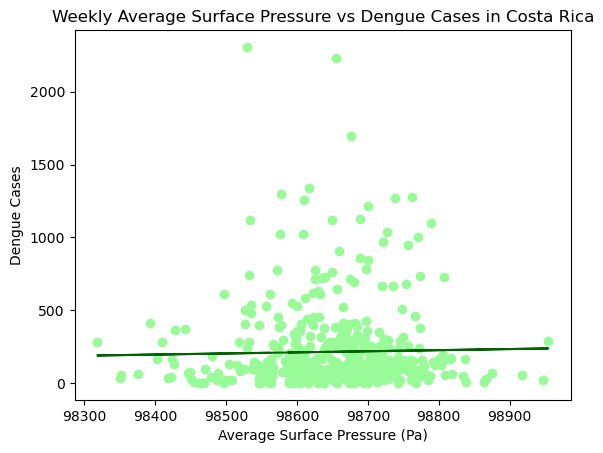

In [98]:
# plot pressure (x) vs dengue cases (y)
plt.scatter(x_test, y_test, color="palegreen")
plt.plot(x_test, lin_reg_pred, color="darkgreen")
plt.title("Weekly Average Surface Pressure vs Dengue Cases in Costa Rica")
plt.xlabel("Average Surface Pressure (Pa)")
plt.ylabel("Dengue Cases")
plt.savefig("Pressure_Linear_Model.png",format="png")
plt.show()

In [41]:
# convert it to a dataframe with xarrray
rainfallDF = pd.read_csv("C:\\Users\\emily\\Downloads\\CHIRPS_93_23.csv") # the Date column should now be converted to the epi week
# get rid of the time on the end of each date by splitting on the white space
rainfallDF["date"] = rainfallDF["Date"].str.split(" ", expand=True)[0]
rainfallDF = rainfallDF.drop("Date",axis=1)
# strip the white space from the right of each date
rainfallDF["date"] = rainfallDF["date"].apply(lambda x: x.rstrip(" "))
rainfallDF

,UCSB CHIRPS Rainfall: avg,date
0,1.607,1/1/1993
1,0.009,1/2/1993
2,0.061,1/3/1993
3,0.036,1/4/1993
4,0.606,1/5/1993
...,...,...
11286,2.380,11/26/2023
11287,1.651,11/27/2023
11288,0.618,11/28/2023
11289,22.541,11/29/2023


In [42]:
# use pandas to convert the string to a datetime object 
# converting the string to datetime format 
rainfallDF['date'] = pd.to_datetime(rainfallDF['date']) 
rainfallDF

,UCSB CHIRPS Rainfall: avg,date
0,1.607,1993-01-01
1,0.009,1993-01-02
2,0.061,1993-01-03
3,0.036,1993-01-04
4,0.606,1993-01-05
...,...,...
11286,2.380,2023-11-26
11287,1.651,2023-11-27
11288,0.618,2023-11-28
11289,22.541,2023-11-29


In [43]:
# convert the date column to epi weeks
rainfallDF['EPI'] = rainfallDF["date"].apply(Week.fromdate)
rainfallDF = rainfallDF.drop("date", axis=1)

# export the dataframe as a csv
rainfallDF.to_csv("CHIRPS.csv", index=False)

In [50]:
# now that the EPI column is a string object, importing the csv will allow splitting
# import the new csv file, which has the epi column now as an iterable object
allDF = pd.read_csv("All_Data.csv")
# cast EPI as a string so it can be split
allDF["EPI"] = allDF["EPI"].astype("str")
allDF["SEMANA"] = allDF["EPI"].apply(lambda x: int(x[-2:]))
allDF["YEAR"] = allDF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1618):
    if allDF["SEMANA"][i] == 53:
        # drop the row
        allDF = allDF.drop(i)
allDF = allDF.reset_index().drop("index", axis=1)
allDF

,EPI,t2m,e,lai_hv,lai_lv,ssr,tcc,SEMANA,YEAR
0,199301,297.78940,-0.103413,2.165826,1.131991,28923.4690,0.627398,1,1993
1,199302,297.64352,-0.102992,2.171554,1.131615,42002.4530,0.650488,2,1993
2,199303,298.32034,-0.119359,2.174013,1.131891,59272.6520,0.279556,3,1993
3,199304,298.37518,-0.140828,2.174992,1.132465,68860.8500,0.469671,4,1993
4,199305,298.42550,-0.137572,2.175970,1.133039,83244.4200,0.392348,5,1993
...,...,...,...,...,...,...,...,...,...
1607,202348,299.20435,-0.108853,2.109212,1.113584,4708.1646,0.621207,48,2023
1608,202349,299.68005,-0.116649,2.125968,1.122183,7369.7856,0.275649,49,2023
1609,202350,299.59400,-0.118850,2.142508,1.130597,8993.7530,0.423409,50,2023
1610,202351,299.16440,-0.172912,2.151682,1.132953,13533.6400,0.723535,51,2023


In [3]:
# import the new csv file, which has the epi column now as an iterable object
chirpsDF = pd.read_csv("CHIRPS.csv")
# cast EPI as a string so it can be split
chirpsDF["EPI"] = chirpsDF["EPI"].astype("str")
# groupby the epi week and aggregate based on the sum of the average rainfall
chirpsDF = chirpsDF[["UCSB CHIRPS Rainfall: avg","EPI"]].groupby(["EPI"]).agg({"UCSB CHIRPS Rainfall: avg":"mean"}).reset_index()

chirpsDF["SEMANA"] = chirpsDF["EPI"].apply(lambda x: int(x[-2:]))
chirpsDF["YEAR"] = chirpsDF["EPI"].apply(lambda x: int(x[:4]))
# if the semana is 53, delete that row
for i in range(0,1614):
    if chirpsDF["SEMANA"][i] == 53:
        # drop the row
        chirpsDF = chirpsDF.drop(i)
chirpsDF = chirpsDF.reset_index().drop("index", axis=1)
chirpsDF

,EPI,UCSB CHIRPS Rainfall: avg,SEMANA,YEAR
0,199301,10.280571,1,1993
1,199302,10.898143,2,1993
2,199303,0.737286,3,1993
3,199304,0.761857,4,1993
4,199305,3.294000,5,1993
...,...,...,...,...
1603,202344,24.391143,44,2023
1604,202345,7.848857,45,2023
1605,202346,17.535429,46,2023
1606,202347,8.357000,47,2023


In [4]:
climateDF = pd.read_csv("Climate_Correlations.csv")
# drop the semana and year columns from the chirpsDF
chirpsDF = chirpsDF.drop(["SEMANA","YEAR"], axis=1)
# convert the EPI column to integers
chirpsDF["EPI"] = chirpsDF["EPI"].astype("int")
# merge climateDF and chirpsDF
allClimateDF = pd.merge(climateDF, chirpsDF, on="EPI")
allClimateDF

,EPI,t2m,e,lai_hv,lai_lv,ssr,tcc,tp,sp,SEMANA,YEAR,CASES,UCSB CHIRPS Rainfall: avg
0,199301,297.78940,-0.103413,2.165826,1.131991,28923.4690,0.627398,0.348911,98784.220,1,1993,0,10.280571
1,199302,297.64352,-0.102992,2.171554,1.131615,42002.4530,0.650488,0.221464,98767.760,2,1993,0,10.898143
2,199303,298.32034,-0.119359,2.174013,1.131891,59272.6520,0.279556,0.083928,98680.150,3,1993,0,0.737286
3,199304,298.37518,-0.140828,2.174992,1.132465,68860.8500,0.469671,0.121633,98528.510,4,1993,0,0.761857
4,199305,298.42550,-0.137572,2.175970,1.133039,83244.4200,0.392348,0.138129,98673.305,5,1993,0,3.294000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,202344,298.30900,-0.135437,2.085116,1.089771,3374.0293,0.988676,1.277918,98577.734,44,2023,0,24.391143
1265,202345,299.34320,-0.105246,2.080401,1.093079,3568.6658,0.742897,0.684428,98469.430,45,2023,0,7.848857
1266,202346,299.11030,-0.115640,2.078321,1.097037,2740.3990,0.949415,0.948230,98488.010,46,2023,0,17.535429
1267,202347,298.80582,-0.112461,2.092449,1.104988,3255.7290,0.793152,0.755001,98718.160,47,2023,0,8.357000


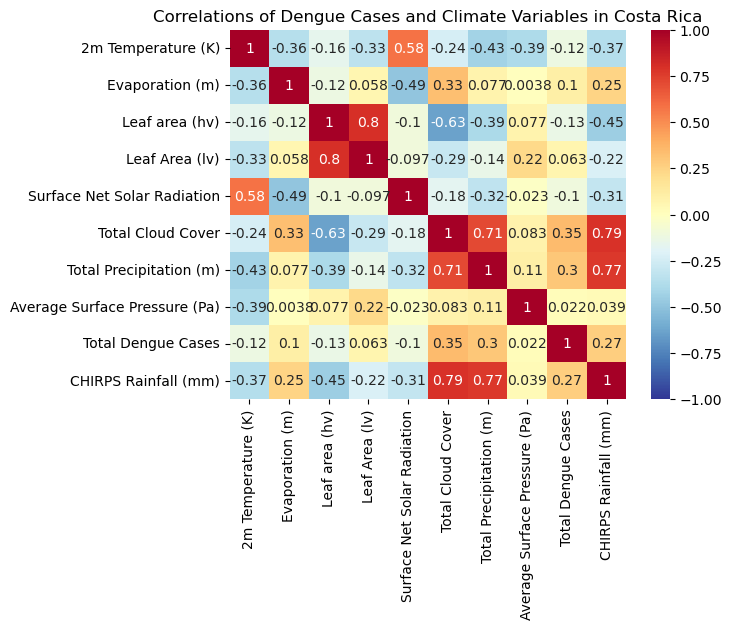

In [72]:
# check if there is a correlation between chirps and total precipitation
# remove the epi column
corrDF = allClimateDF.drop(["EPI","SEMANA","YEAR"],axis=1)
# rename the columns
corrDF = corrDF.rename(columns={"CASES":"Total Dengue Cases","tp":"Total Precipitation (m)",
                                     "sp":"Average Surface Pressure (Pa)","tcc":"Total Cloud Cover",
                                     "t2m":"2m Temperature (K)","ssr":"Surface Net Solar Radiation",
                                             "e":"Evaporation (m)","lai_hv":"Leaf area (hv)","lai_lv":"Leaf Area (lv)",
                               "UCSB CHIRPS Rainfall: avg":"CHIRPS Rainfall (mm)"})

# create a correlation matrix
vmax = 1.0
corrMatrix = corrDF.corr()
ax = sb.heatmap(corrMatrix, annot=True, cmap="RdYlBu_r", vmin=-vmax, vmax=vmax,)
ax.set(title="Correlations of Dengue Cases and Climate Variables in Costa Rica")
plt.savefig("Dengue_Climate_Correlations_CHIRPS.png".format(ax), format="png",bbox_inches="tight")
plt.show()

In [5]:
# groupby the year and aggregate based on either the sum of average of the different metrics
sumClimateDF = allClimateDF.groupby(["YEAR"]).agg({"t2m":"mean","e":"sum","lai_hv":"mean","lai_lv":"mean","ssr":"mean","tcc":"mean","tp":"sum","CASES":"sum","UCSB CHIRPS Rainfall: avg":"sum"}).reset_index()
sumClimateDF

,YEAR,t2m,e,lai_hv,lai_lv,ssr,tcc,tp,CASES,UCSB CHIRPS Rainfall: avg
0,1993,298.396872,-6.218515,2.112046,1.105559,68166.967815,0.694693,20.966414,4601,440.323286
1,1994,298.474629,-6.067759,2.111141,1.105030,72434.637049,0.665218,16.240970,13381,393.482714
2,1995,298.399698,-6.560500,2.112051,1.105558,64620.949362,0.708826,29.685448,4922,433.536571
3,1996,298.097723,-6.045529,2.112027,1.105505,65929.970917,0.713757,22.751055,2292,475.701714
4,1997,298.665690,-6.893951,2.112058,1.105558,72147.319398,0.682495,19.639720,14325,420.229429
5,1998,298.912190,-7.029295,2.112044,1.105559,68836.111304,0.725120,24.243304,2632,447.926571
6,1999,297.794998,-6.588443,2.112046,1.105559,64628.194569,0.737035,28.753633,6041,455.275714
7,2000,298.027781,-6.575263,2.112018,1.105505,66890.687838,0.701693,23.931944,4908,415.963714
8,2001,298.302128,-6.622804,2.112053,1.105558,71095.490069,0.703239,21.964528,9416,416.938000
9,2002,298.665242,-6.966929,2.112056,1.105558,69319.572948,0.684869,23.307157,12251,433.371429


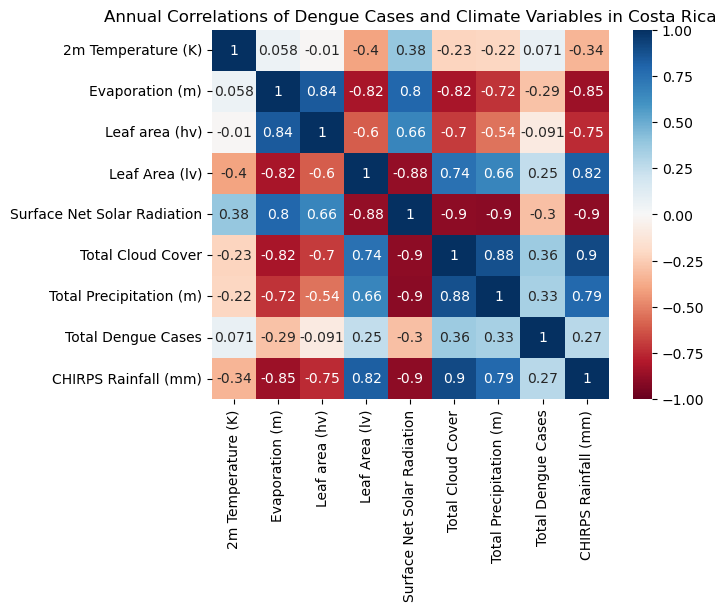

In [9]:
# make a correlation matrix for the above data
# check if there is a correlation between chirps and total precipitation
# remove the epi column
corrDF = sumClimateDF.drop(["YEAR"],axis=1)
# rename the columns
corrDF = corrDF.rename(columns={"CASES":"Total Dengue Cases","tp":"Total Precipitation (m)",
                                     "tcc":"Total Cloud Cover",
                                     "t2m":"2m Temperature (K)","ssr":"Surface Net Solar Radiation",
                                             "e":"Evaporation (m)","lai_hv":"Leaf area (hv)","lai_lv":"Leaf Area (lv)",
                               "UCSB CHIRPS Rainfall: avg":"CHIRPS Rainfall (mm)"})

# create a correlation matrix
vmax = 1.0
corrMatrix = corrDF.corr()
ax = sb.heatmap(corrMatrix, annot=True, cmap="RdBu", vmin=-vmax, vmax=vmax,)
ax.set(title="Annual Correlations of Dengue Cases and Climate Variables in Costa Rica")
plt.savefig("Annual_Climate_Correlations_CHIRPS.png".format(ax), format="png",bbox_inches="tight")
plt.show()

In [10]:
# convert the data to a csv file
sumClimateDF.to_csv("ClimateVars.csv",index=False)

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=sumClimateDF['YEAR'], y=sumClimateDF['CASES'],
                     name='Total Dengue Cases',
                     marker_color = 'lightcoral',
                     marker_line_color='rgb(8,48,107)',
                     marker_line_width=1, offsetgroup=1),
              row = 1, col = 1, secondary_y=False)

fig.add_trace(go.Bar(x=sumClimateDF['YEAR'], y=sumClimateDF['tcc'], marker_color="mediumaquamarine",marker_line_color="rgb(8,48,107)",
                     marker_line_width=1, name='Total Cloud Cover (proportion)',offsetgroup=2),
              row = 1, col = 1, secondary_y=True)
# add labels
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Total Dengue Cases", color="lightcoral",secondary_y=False)
fig.update_yaxes(title_text="Total Cloud Cover (proportion)", color="mediumaquamarine",secondary_y=True)
# add a title
fig.update_layout(title_text="Annual Dengue Cases Compared to Total Cloud Cover in Costa Rica", title_x=0.5)
fig.show()

In [22]:
# group the climate data on epi week(
epiDF = allClimateDF.groupby("SEMANA").agg({"CASES":"sum","tcc":"mean"}).reset_index()

In [26]:
# compare this to per epi week
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=epiDF['SEMANA'], y=epiDF['CASES'],
                     name='Total Dengue Cases',
                     marker_color = 'midnightblue',
                     marker_line_color='rgb(8,48,107)',
                     marker_line_width=1, offsetgroup=2),
              row = 1, col = 1, secondary_y=False)

fig.add_trace(go.Bar(x=epiDF['SEMANA'], y=epiDF['tcc'], marker_color="mediumorchid",marker_line_color="rgb(8,48,107)",
                     marker_line_width=1, name='Total Cloud Cover (proportion)',offsetgroup=1),
              row = 1, col = 1, secondary_y=True)
# add labels
fig.update_xaxes(title_text="Epi Week")
fig.update_yaxes(title_text="Total Dengue Cases", color="midnightblue",secondary_y=False)
fig.update_yaxes(title_text="Total Cloud Cover (proportion)", color="mediumorchid",secondary_y=True)
# add a title
fig.update_layout(title_text="Weekly Dengue Cases Compared to Total Cloud Cover in Costa Rica", title_x=0.5)
fig.show()

In [29]:
# stacked bar chart showing the correlations from year to year
# isolate only the columns needed
smallDF = allClimateDF[["YEAR","SEMANA","CASES","tcc"]]
smallDF = smallDF.reset_index()
smallDF

,index,YEAR,SEMANA,CASES,tcc
0,0,1993,1,0,0.627398
1,1,1993,2,0,0.650488
2,2,1993,3,0,0.279556
3,3,1993,4,0,0.469671
4,4,1993,5,0,0.392348
...,...,...,...,...,...
1264,1264,2023,44,0,0.988676
1265,1265,2023,45,0,0.742897
1266,1266,2023,46,0,0.949415
1267,1267,2023,47,0,0.793152


In [35]:
dengueDF = pd.read_csv("Dengue_Costa_Rica.csv")
incDF = dengueDF[["YEAR","CANTON","SEMANA","INCIDENCE"]].query("CANTON=='TOTAL DEL PAIS'").reset_index()
# drop any rows that have 53 as the epi week
for i in range(0,1282):
    if incDF["SEMANA"][i] == 53:
        # drop the row
        incDF = incDF.drop(i)
        incDF.reset_index()
incDF = incDF.reset_index().drop("index", axis=1)
incDF = incDF.drop(["level_0","CANTON"], axis=1)
# drop the year and semana rows so there are no duplicates upon merging
incDF = incDF.drop(["YEAR","SEMANA"],axis=1).reset_index()
# now merge incDF with smallDF 
largeDF = pd.merge(smallDF, incDF, on="index")
# drop the redundant index column
largeDF = largeDF.drop("index", axis=1)


# find the correlations
# largeDF["tcc"].corr(largeDF["CASES"]) # this is .349
# largeDF["tcc"].corr(largeDF["INCIDENCE"]) # this is .3453, so a smaller correlation

0.3452856362135037

In [5]:
allClimateDF

,EPI,t2m,e,lai_hv,lai_lv,ssr,tcc,tp,sp,SEMANA,YEAR,CASES,UCSB CHIRPS Rainfall: avg
0,199301,297.78940,-0.103413,2.165826,1.131991,28923.4690,0.627398,0.348911,98784.220,1,1993,0,10.280571
1,199302,297.64352,-0.102992,2.171554,1.131615,42002.4530,0.650488,0.221464,98767.760,2,1993,0,10.898143
2,199303,298.32034,-0.119359,2.174013,1.131891,59272.6520,0.279556,0.083928,98680.150,3,1993,0,0.737286
3,199304,298.37518,-0.140828,2.174992,1.132465,68860.8500,0.469671,0.121633,98528.510,4,1993,0,0.761857
4,199305,298.42550,-0.137572,2.175970,1.133039,83244.4200,0.392348,0.138129,98673.305,5,1993,0,3.294000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,202344,298.30900,-0.135437,2.085116,1.089771,3374.0293,0.988676,1.277918,98577.734,44,2023,0,24.391143
1265,202345,299.34320,-0.105246,2.080401,1.093079,3568.6658,0.742897,0.684428,98469.430,45,2023,0,7.848857
1266,202346,299.11030,-0.115640,2.078321,1.097037,2740.3990,0.949415,0.948230,98488.010,46,2023,0,17.535429
1267,202347,298.80582,-0.112461,2.092449,1.104988,3255.7290,0.793152,0.755001,98718.160,47,2023,0,8.357000


In [6]:
# groupby the semana and either sum up or average the other columns
semDF = allClimateDF.groupby("SEMANA").agg({"t2m":"mean","e":"mean","lai_hv":"mean","lai_lv":"mean","ssr":"mean","tcc":"mean","CASES":"mean","UCSB CHIRPS Rainfall: avg":"mean","tp":"mean"}).reset_index()
semDF

,SEMANA,t2m,e,lai_hv,lai_lv,ssr,tcc,CASES,UCSB CHIRPS Rainfall: avg,tp
0,1,298.118029,-0.118711,2.164296,1.132095,30591.052200,0.452204,129.920000,5.851686,0.179538
1,2,298.122845,-0.128534,2.170070,1.131710,41817.777720,0.434051,115.760000,4.594783,0.188101
2,3,298.247476,-0.131761,2.173638,1.131764,55577.024200,0.350173,108.120000,1.873080,0.109560
3,4,298.376316,-0.137290,2.174735,1.132315,68333.630200,0.379686,97.160000,2.508737,0.111440
4,5,298.468222,-0.138196,2.175714,1.132888,81040.796760,0.343773,90.360000,3.857971,0.106046
5,6,298.599729,-0.138103,2.176691,1.133461,92530.364920,0.326268,86.760000,1.676417,0.097894
6,7,298.710971,-0.142823,2.175128,1.132147,100023.972240,0.367039,85.920000,2.770629,0.120891
7,8,298.727240,-0.142374,2.163430,1.123299,107870.249760,0.359841,82.320000,2.710360,0.109369
8,9,298.952901,-0.145708,2.149536,1.112824,112972.824680,0.363855,81.280000,1.842377,0.089478
9,10,299.040158,-0.150566,2.135645,1.102347,115128.651960,0.360465,71.360000,2.144320,0.080484


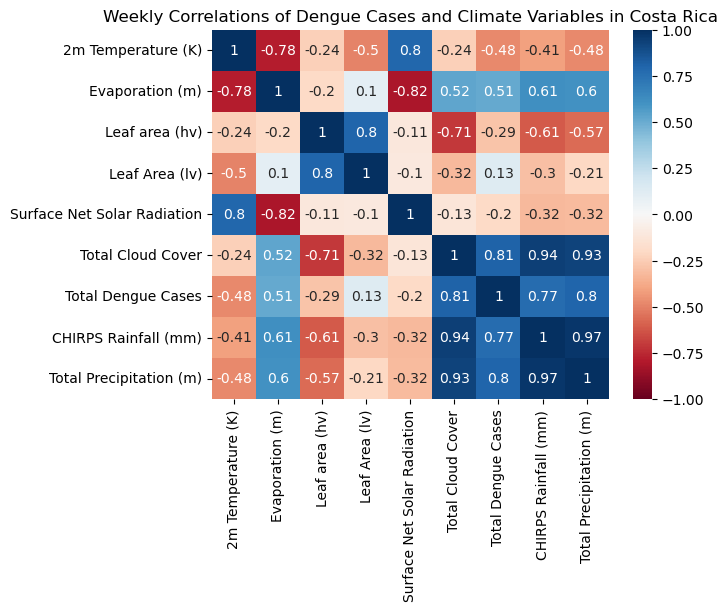

In [8]:
# make a correlation matrix for the above data
# check if there is a correlation between chirps and total precipitation
# remove the epi column
corrDF = semDF.drop(["SEMANA"],axis=1)
# rename the columns
corrDF = corrDF.rename(columns={"CASES":"Total Dengue Cases","tp":"Total Precipitation (m)",
                                     "tcc":"Total Cloud Cover",
                                     "t2m":"2m Temperature (K)","ssr":"Surface Net Solar Radiation",
                                             "e":"Evaporation (m)","lai_hv":"Leaf area (hv)","lai_lv":"Leaf Area (lv)",
                               "UCSB CHIRPS Rainfall: avg":"CHIRPS Rainfall (mm)"})

# create a correlation matrix
vmax = 1.0
corrMatrix = corrDF.corr()
ax = sb.heatmap(corrMatrix, annot=True, cmap="RdBu", vmin=-vmax, vmax=vmax,)
ax.set(title="Weekly Correlations of Dengue Cases and Climate Variables in Costa Rica")
plt.savefig("Weekly_Climate_Correlations.png".format(ax), format="png",bbox_inches="tight")
plt.show()

In [9]:
# save semDF as a csv file
semDF.to_csv("Climate.csv",index=False)

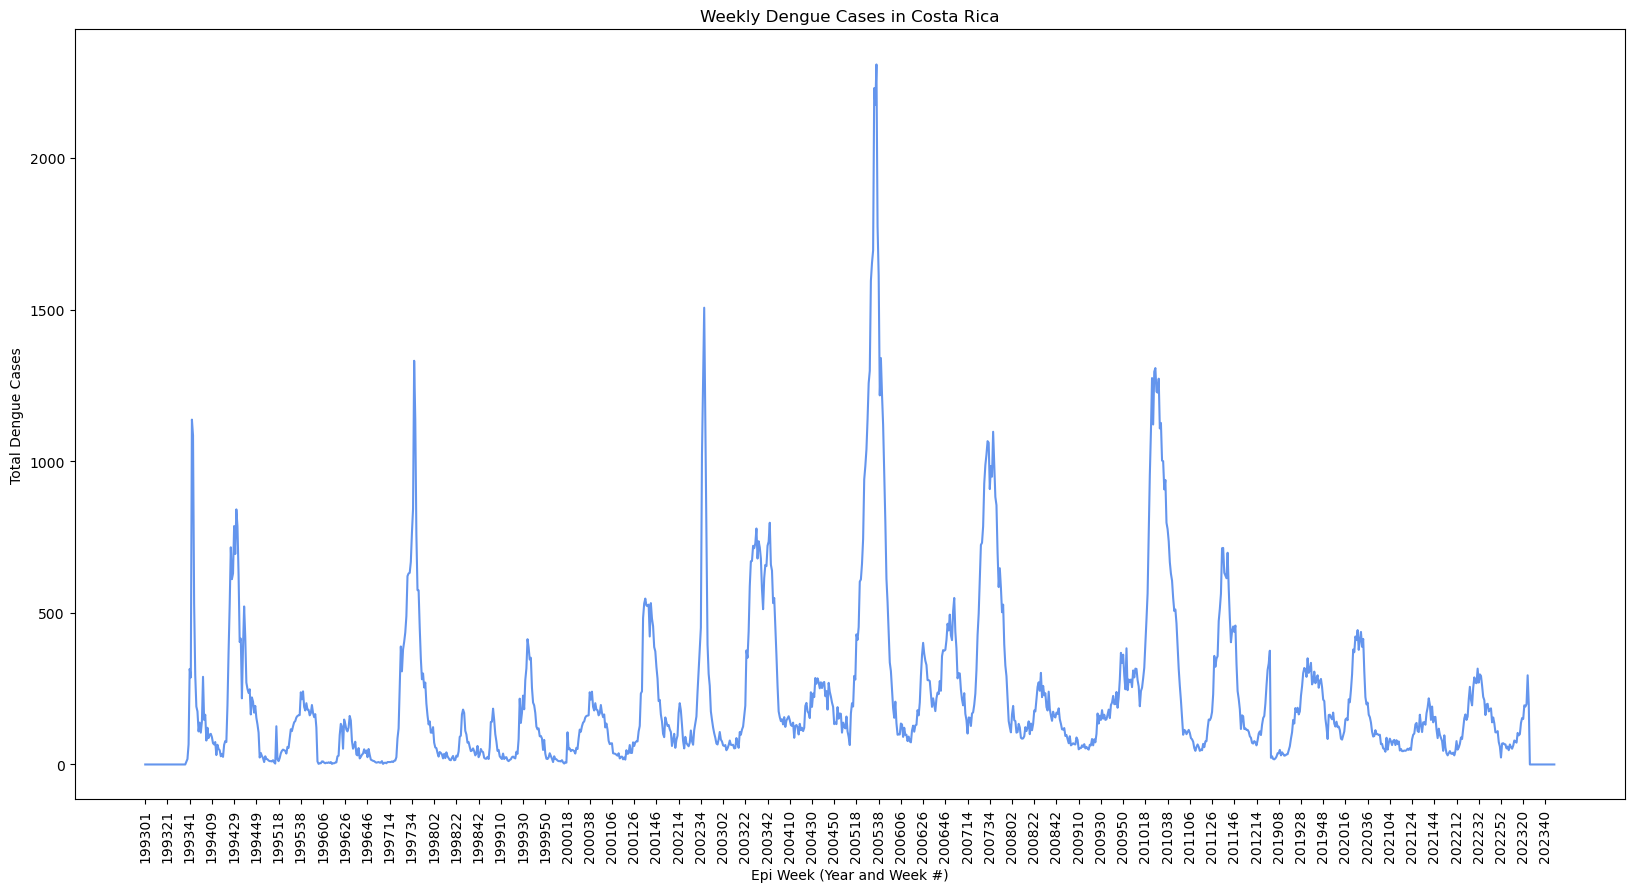

In [54]:
# graph all the years of dengue cases on the same line chart
# use sb.lineplot
fig,ax1 = plt.subplots(figsize=(20, 10))
# subplots returns two values in a tuple for when we have two variables separated by commas
ax1 = sb.lineplot(x="EPI_2",y="CASES",data=allClimateDF,ax=ax1, color="cornflowerblue")
# ax2 = ax1.twinx() # this creates a second axis object with the two plots sharing the x axis
# sb.lineplot(x="EPI",y="tp",data=allClimateDF,ax=ax2,color="darkviolet") # color sets it to red

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(allClimateDF["EPI_2"], allClimateDF["EPI"], rotation='vertical')
# set the labels
ax1.set_xlabel("Epi Week (Year and Week #)")
ax1.set_ylabel("Total Dengue Cases") # specify the label then the color
ax1.set_xticks(ax1.get_xticks()[::20])
# ax2.set_ylabel("Total Precipitation (m)",color="darkviolet") # this makes the graph easier to read
# add a title
plt.title("Weekly Dengue Cases in Costa Rica")
plt.savefig("Dengue_Lineplot_Weird.png".format(fig), format="png")

In [33]:
# convert the EPi column values to a string
allClimateDF["EPI_2"] = allClimateDF["EPI"].astype("str")

In [36]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(go.Bar(x=allClimateDF['EPI_2'], y=allClimateDF['CASES'],
                     name='Total Dengue Cases',
                     marker_color = 'lightgrey',
                     marker_line_color='rgb(8,48,107)',
                     marker_line_width=1),
              row = 1, col = 1)

# fig.add_trace(go.Scatter(x=allClimateDF['EPI'], y=allClimateDF['tp'], line=dict(color='crimson'), name='Total Precipitation (m)'),
              # row = 1, col = 1, secondary_y=True)
# add labels
fig.update_xaxes(title_text="Epi Week (Semana)")
fig.update_yaxes(title_text="Total Dengue Cases")
# fig.update_yaxes(title_text="Total Precipitation (m)", color="crimson",secondary_y=True)
# add a title
fig.update_layout(title_text="Weekly Dengue Cases in Costa Rica", title_x=0.5)
# fig.write_html("Weekly_Rain_Dengue.html")
fig.show()